In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [64]:
x,y = datasets.make_regression(n_samples=100,n_features=1,n_informative=10, n_targets=1, bias=100, effective_rank=None, tail_strength=0.5, noise=4, shuffle=True, coef=False, random_state=100)

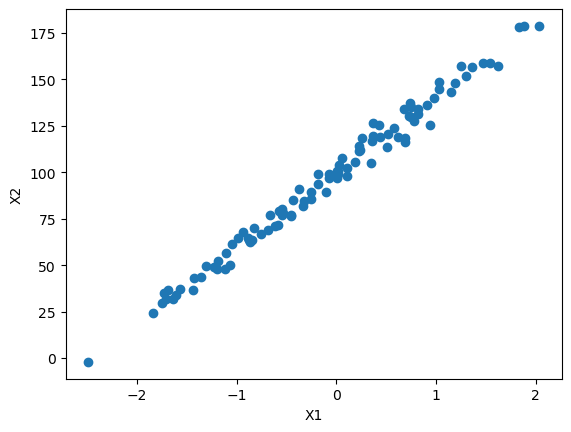

In [66]:
plt.scatter(x[:, 0],y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [67]:
def random_state_calc(features_df,Target):
    model=LinearRegression()
    ts_score=[]
    ts_rsme=[]
    for j in range(500):
        X_train,X_test,Y_train,Y_test=train_test_split(features_df,Target,test_size=0.30,random_state=j)
        model.fit(X_train,Y_train)
        ts_score.append(model.score(X_test, Y_test))
        y_pred =model.predict(X_test)
        s=mean_squared_error(Y_test, y_pred, squared=True)
        ts_rsme.append(s)
    J = ts_score.index(np.max(ts_score))
    M= ts_rsme.index(np.min(ts_rsme))
    return M

In [69]:
x=np.array(x)
y=np.array(y)
m=random_state_calc(x,y)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=m)


print("Model running .....")
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
print()
print("Coefficient of determination ",model.score(X_test,y_test))
print("Intercept = ",model.intercept_)
print('coeff:',model.coef_)


print("The Equation of model : Y={0}-{1}x1".format(model.intercept_,model.coef_[0]))

rsme=mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)
sme= mean_squared_error(y_test, y_pred)

print("Root_mean_squared = ",rsme)
print("Mean_absolute_error = ",mae)
print("Mean_squared_error = ",sme)

Model running .....

Coefficient of determination  0.9938312321487873
Intercept =  99.97848440265922
coeff: [40.40138412]
The Equation of model : Y=99.97848440265922-40.40138411843967x1
Root_mean_squared =  3.0736536125515466
Mean_absolute_error =  2.346447904238026
Mean_squared_error =  9.447346529951172


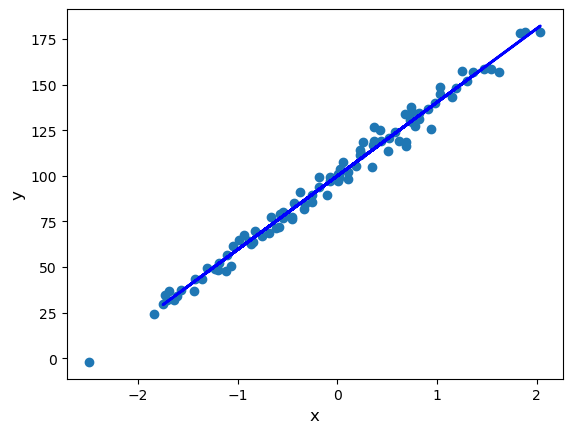

In [70]:
fig, ax = plt.subplots()
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)

plt.scatter(x = x, y = y)
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.show()

# Increasing number of outliers by increamenting noise 

In [73]:
x,y = datasets.make_regression(n_samples=100,n_features=1,n_informative=10, n_targets=1, bias=100, effective_rank=None, tail_strength=0.5, noise=10, shuffle=True, coef=False, random_state=100)

In [74]:
x=np.array(x)
y=np.array(y)
m=random_state_calc(x,y)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=m)


print("Model running .....")
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
print()
print("Coefficient of determination ",model.score(X_test,y_test))
print("Intercept = ",model.intercept_)
print('coeff:',model.coef_)


print("The Equation of model : Y={0}-{1}x1".format(model.intercept_,model.coef_[0]))

rsme=mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)
sme= mean_squared_error(y_test, y_pred)

print("Root_mean_squared = ",rsme)
print("Mean_absolute_error = ",mae)
print("Mean_squared_error = ",sme)

Model running .....

Coefficient of determination  0.9631092277665537
Intercept =  99.94621100664808
coeff: [40.57141059]
The Equation of model : Y=99.94621100664808-40.57141058922787x1
Root_mean_squared =  7.684134031378873
Mean_absolute_error =  5.866119760595067
Mean_squared_error =  59.045915812194934


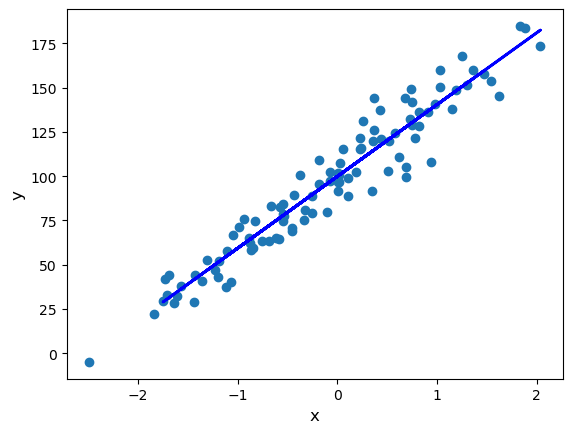

In [75]:
fig, ax = plt.subplots()
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)

plt.scatter(x = x, y = y)
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.show()

# As we can see clearly the increase in noise bought more number of outliers and reduced therefore the coefficient of determination has fallen as well as RSME MSE and MAE also have risen , thus clearly proven outliers have affected the performance of the model

In [87]:
communities=pd.read_csv(r"K:\Desktop\NIIT\Challenge\Course_9\DS2_C5_S2_Communities_Data_Challenge.data")
communities.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


## Removing first 5 columns

In [90]:
communities=communities.iloc[:,6:]

In [112]:
(communities.isna().sum()==False).value_counts()

True    122
dtype: int64

In [116]:
for item in communities.columns:
        communities=communities[communities[item]!='?']

In [117]:
x=np.array(communities.iloc[:,:121]).reshape(-1,121)
y=np.array(communities.iloc[:,121])
m=random_state_calc(x,y)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=m)


print("Model running .....")
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
print()
print("Coefficient of determination ",model.score(X_test,y_test))
print("Intercept = ",model.intercept_)
print('coeff:',model.coef_)


rsme=mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)
sme= mean_squared_error(y_test, y_pred)

print("Root_mean_squared = ",rsme)
print("Mean_absolute_error = ",mae)
print("Mean_squared_error = ",sme)

Model running .....

Coefficient of determination  0.4347465010963303
Intercept =  4.246945464342372
coeff: [ 1.84378351e+00  5.69924200e-02  4.00618115e-01 -1.47074035e-01
 -2.46121067e-03 -8.02677546e-01 -3.37353771e-01  9.88059600e-02
  1.20192016e-01  1.42953714e-01 -1.50592032e-01 -1.73306517e+00
 -6.02680574e-01 -2.49745721e-01 -6.15535364e-01 -9.37386251e-01
 -5.15213643e-02 -8.17520841e-02  1.36889707e+00 -5.68948866e-01
  4.09181333e-01 -2.28153828e-01 -7.63630993e-02 -1.19697017e-01
  1.82400595e-01 -9.59772815e-02 -2.42116360e-01  7.01680257e-01
 -4.12278809e-01 -3.83649803e-01 -3.18632618e-01 -1.21626497e-01
  2.47694364e-01 -2.78680131e-01  1.08520945e-02  5.89795387e-01
  9.72334528e-01  1.54882548e+00 -3.76651382e-01  2.57246779e+00
 -4.56862485e+00  3.68018445e-01 -1.24120204e-01 -1.44114029e+00
 -3.95082499e-01  2.09555609e-01 -4.49927706e-01  4.44121189e-01
 -1.11258411e-01 -3.27167449e-01 -1.43794893e-01  5.37134385e-01
 -5.70665118e-02 -1.01205013e+00  6.73644564e-0

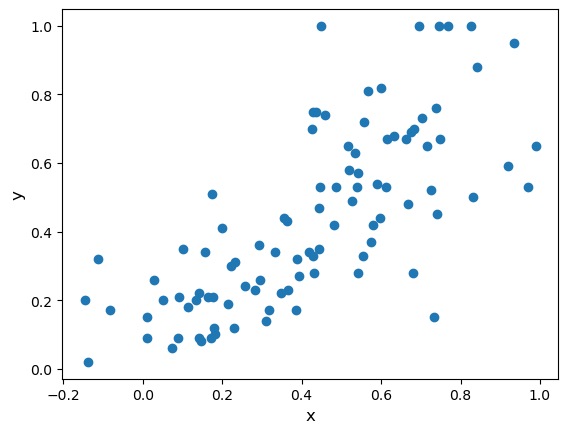

In [122]:
fig, ax = plt.subplots()
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)

plt.scatter(x =y_pred, y = y_test)
plt.show()